# Graphe pré construit avec la position donnée par networkx

### Introduction 


	Notre projet initial consistait à reproduire un réseau social, qui rapprocherait les personnes ayant des points communs (par exemple : villes, écoles, sports, etc.). Nous avons donc étudié les réseaux sociaux et en passant du temps dessus, nous avons constaté qu’ils ne parlaient que d’une chose en cette période de confinement : le Covid-19. C’est ainsi qu’une idée nous vînt en tête, et si nous reproduisions un algorithme de propagation d’un virus dans une population donnée ? 

I)	Le rapprochement social.

Pour qu’il y ait contamination, il doit y avoir rapprochement. Deux individus n’ayant aucun point commun ne se rencontreront jamais et ne pourront donc pas se transmettre la maladie. Finalement, notre projet initial n’a pas été abandonné, mais condensé dans cette partie. Nous cherchons ici à créer des liens entre les individus pour qu’ils puissent se transmettre le virus (c’est virtuel, nous ne voulons contaminer personne !) 

II)	Introduction du virus dans la population.

L’expérience prend plusieurs variables en compte :
- La contamination. Au jour 0, notre expérience commence : un individu aléatoire est contaminé. À partir de là, cet individu pourra contaminer les gens qui lui sont proches (d’où la partie 1). Le lendemain il pourra toujours contaminer ceux qu’il n’a pas contaminés le 1er jour et les personnes contaminées au jour 1 pourront elles aussi contaminer leur entourage à partir du jour 2. On peut choisir la probabilité de contamination, étant donné que l’on ne contamine pas son entourage à coup sûr. Nous observerons jour après jour le nombre de personnes contaminées. 
- L’immunité. Nous choisirons combien de temps les individus restent contaminés et peuvent transmettre le virus. Après cette période, les individus ne sont plus malades mais ne peuvent plus être contaminés par ceux qui sont encore malades. 
- La mort. La maladie s’accompagne malheureusement souvent de la mort. Nous choisirons également la probabilité qu’un individu décède suite à cette maladie.

III)	Expériences et résultats.

Lorsque l’on appliquera cette expérience, nous changerons les variables pour obtenir différents résultats et en tirer des conclusions :
   - Lors de la 1ère expérience nous regarderons les conséquences d’un confinement retardé.
   - La 2ème expérience consiste à étudier différent type de déconfinement, l’un brutal et l’autre progressif.
   - La 3ème expérience nous regarderons les conséquences d’un déconfinement trop tot.
   - Enfin, pour la dernière expérience nous avons voulu nous amuser un peu et imaginé un cas d’apocalypse zombie.Ici, Les individus restent malades jusqu’à ce qu’ils meurent. Nous observerons donc combien de survivants il y aurait après 100 jours de pandémie.



### on import les bibliothèques utiles et on crée notre class  

In [50]:
import networkx as nx
import random
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
import pandas as pd
import time

In [51]:
class GrapheConstruit :
    def __init__(self, nodes=[], edges=[], NombreAttributs=10, NombreAttributsPersonne=4):
        """on intitialise notre graphe on demande les nodes et les edges déjà construits .
        on va ensuite attribuer aléatoirement à chaque connexion (edges) un nombre d'attributs
        partagés entre les deux nodes ces attributs sont tirés aléatoirement parmis un nombre 
        d'attributs total demandé"""
        
        self.nodes = list(nodes)
        self.edges = list(edges)
        self.NombrePersonnes = len(nodes)
        self.graph = {}
        self.pos = {}
        
        # on définit un type de lien pour différencier les différents liens que l'on va créer
        self.EdgesType = []
        
        # on initialise notre graphe, on lui donne les nodes
        for i in nodes:
            self.graph[i] = {}
        
        # on initialise notre graphe, on lui donne pour chaque node ces différentes connexions
        for i in nodes:
            for j in edges:
                if i == j[0]:
                    
                    # on choisit aléatoirement un certain nombre d'attributs pour chaque lien
                    Attributs = random.sample(range(1, NombreAttributs), NombreAttributsPersonne)
                    
                    # on attribue aux nodes du graphe 2 éléments
                    #( les attributs en commun, le type de connexion )
                    self.graph[i][j[1]] = [Attributs,0]
                    self.graph[j[1]][i] = [Attributs,0]
                    

                    
    def UploadEdges (self):
        self.edges = []
        self.EdgesType = []
        for i in range (len(self.nodes)):
            for j in self.graph[i].keys():
                if j > i:  
                    if self.graph[i][j][1] == 1:                        
                        self.edges.append((i,j))
                        self.EdgesType.append(1)
                    elif self.graph[i][j][1] == 0:
                        self.edges.append((i,j))
                        self.EdgesType.append(0)

    def UploadEdgesPropagation (self):
        self.EdgesPropagation = []
        self.EdgesType = []
        for i in self.GraphPropagation.keys():
            for j in self.GraphPropagation[i].keys():
                if j > i:  
                    if self.GraphPropagation[i][j][1] == 1:                        
                        self.EdgesPropagation.append((i,j))
                        self.EdgesTypePropagation.append(1)
                    elif self.GraphPropagation[i][j][1] == 0:
                        self.EdgesPropagation.append((i,j))
                        self.EdgesTypePropagation.append(0)

    
    def CreerConnexion (self, i, j, k, n):
        """on crée une fonction qui permet de créer une connexion entre 
        deux nodes i et j avec k comme le node commun aux deux."""
        

        AttributsCommuns = list(set(self.graph[i][k][0]).intersection(self.graph[j][k][0]))
        
        #on créer cette nouvelle connexion dans notre graphe
        self.graph[i][j] = [AttributsCommuns,n]
        self.graph[j][i] = [AttributsCommuns,n]
        
        #on ajoute aussi les nouvelles données à nos listes
  #      self.edges.append((i,j))
   #     self.EdgesType.append(n)
    
    def evolution (self, ScoreMinimum):
        """Cette fonction permet de définir le processus de connexion. La méthode utilisée est celle 
        de l'évolution du réseau par recommendation"""
        NouvelleConnexion = []
        
        # on boucle sur tout les "possibles edges" du réseau (ie: tout les couples (i,j))
        for i in range (self.NombrePersonnes):
            for j in range(i):
                
                scores = []
                
                # on créer une liste avec toutes les connexions créées avec i
                connexion_i = self.graph[i].keys()
        
                # si j fait déjà partie de la liste c'est que i et j sont déjà connectés, on ne veut pas ce cas là
                if not j in connexion_i :
                    
                    # on créer une liste avec toutes les connexions créées avec j
                    connexion_j = self.graph[j].keys()
                    
                    #si l'on trouve au moins 1 node de commun entre les différentes connexions, on continue
                    if len(set(connexion_i).intersection(connexion_j)):
                        
                        # pour tout les nodes en communs il faut calculer celui qui a le meilleur score
                        for k in set(connexion_i).intersection(connexion_j):
                            
                            # on trouve la position de k (le node commun) dans les toutes les connexions de i et j
             #               pos_i = connexion_i.index(k)
             #               pos_j = connexion_j.index(k)
                            
                            # pour calculer le score de cette "possible" connexion on calcule le nombre d'attributs en communs
                            score = len(set(self.graph[i][k][0]).intersection(self.graph[j][k][0]))
                            
                            # on stocke le score avec le noeud en commun
                            scores.append([k,score])
                        
                        # on cherche le meilleur score
                        scores = sorted (scores, key=itemgetter(1), reverse=True)
                        MeilleurScore = sorted (scores, key=itemgetter(1), reverse=True)[0]
                        
                        if MeilleurScore[1] > ScoreMinimum :
                            
                            # si le meilleur score est supèrieur à une certaine valeur on crée la connexion
                            NouvelleConnexion.append([i, j, MeilleurScore[0], 1])
        
        
        # on crée les nouvelles connexions à la fin pour pas géner l'algo                     
        for k in NouvelleConnexion:
            GrapheConstruit.CreerConnexion(self, *k)
    
    
    def ProcessOfEvolution (self, ScoreMinimum, NombreIterations=1 ):
        """ fonction qui itère un nombre de fois donné l'évolution du network"""
        for i in range (NombreIterations):
            
            GrapheConstruit.evolution(self, ScoreMinimum)
            print(i+1,"eme étape faite")
    
    def AjoutCouleurs (self, ListeTypeConnexion, Connexion0='k', Connexion1='b'):
        """permet d'ajouter des couleurs suivant le type de connexion"""
        self.EdgesColor = []
        for i in ListeTypeConnexion :
            if i == 0:
                self.EdgesColor.append(Connexion0)
            if i == 1:
                self.EdgesColor.append(Connexion1)                
         
    def GetPos (self, A=0):
        """permet d'enregiter les positions des pts initials """
        
        if A == 0 :   
            return self.pos
        else:
            self.pos = {}   
            for i in A.nodes():
                self.pos[i] = A.nodes[i]['pos']
            return self.pos

    
    def InitPropagation ( self, NombreAttributsMinimum=0, PersonneInitiale=False):
        """On initialise le graph dans le quel on va travailler"""
        
        

        #on crée un nouveau graph 
        self.GraphPropagation = {}
        self.EdgesPropagation = []
        self.EdgesTypePropagation = []
        self.NodesType = []
        self.PersonnesImunisees = []
        self.PersonnesAffectees = []
        
            
        for i in self.nodes :
            self.GraphPropagation[i] = {}
            self.NodesType.append(0)

            # pour tous les noeuds on regarde les connexions créées
            for j in self.graph[i].keys():

                # on garde la connexion si il y a assez d'attributs en commun
                if len(self.graph[i][j][0]) >= NombreAttributsMinimum :
                    self.GraphPropagation[i][j] = [self.graph[i][j][0],0]

                    # boucle if pour ne pas avoir deux fois la même connexion
               #     if i < j:  #voir
               #         self.EdgesPropagation.append((i,j))
               #         self.EdgesTypePropagation.append (0)
        
        if type(PersonneInitiale) == int:
            self.PersonnesTouchees = [PersonneInitiale]
            self.NodesType[PersonneInitiale] = 1
        else:
        
            # on def aléatoirement une personne touchée que l'on met dans une liste de toute les personnes touchées
            self.PersonnesTouchees = [random.randint(1, self.NombrePersonnes)]
            self.NodesType[self.PersonnesTouchees[0]] = 1
        


    def PropagationDeProcheEnProche ( self, PersonneInitiale, PersonneTouchee):
        """Permet d'actualiser le statut d'une personne touchée dans le graphe"""
        
        # on actualise le type de personne

        if not self.NodesType[PersonneTouchee] == 1:
            
            self.NodesType[PersonneTouchee] = 1
            self.PersonnesTouchees.append(PersonneTouchee)
            self.PersonnesAffectees.append(PersonneTouchee)
            # on actualise le type de noeud dans le dictionnaire
            self.GraphPropagation[PersonneTouchee][PersonneInitiale][1] = 1
            self.GraphPropagation[PersonneInitiale][PersonneTouchee][1] = 1

            # on actualise le type de noeud dans la liste
      #      if PersonneInitiale < PersonneTouchee:
      #          self.EdgesTypePropagation[self.EdgesPropagation.index((PersonneInitiale, PersonneTouchee))] =1
       #     else :
       #         self.EdgesTypePropagation[self.EdgesPropagation.index((PersonneTouchee, PersonneInitiale))] =1


    def Disparition (self, personnes, Imu = False):
        for personne in personnes :
            if personne in self.PersonnesTouchees:
                if Imu:
                    self.NodesType[personne] = 2
                    self.PersonnesImunisees.append(personne)
                else:
                    self.NodesType[personne] = 0

                self.PersonnesTouchees.remove(personne)

       #     for j in self.GraphPropagation[personne].keys():
        #        self.GraphPropagation[personne][j][1]= 0
         #       self.GraphPropagation[j][personne][1]= 0
        
        
        
        
    def propagation(self, probabilite):
        """On va simulier une propagation dans un graphe"""
        
        #liste des personnes qui vont être touchées pendant cette vague
        liste = []
        FuturesTouchees = []
        # on parcourt toutes les personnes touchées
        for personne in self.PersonnesTouchees:
            
            
            # on parcourt ses connexions
            for connexion in self.GraphPropagation[personne].keys():
                
                
                # on s'intéresse qu'aux connexions qui ne sont pas touchées
                if not connexion in FuturesTouchees:
                
                    if not connexion in self.PersonnesTouchees :
                        
                        if not connexion in self.PersonnesImunisees:

                            # la personne est touchée avec une certaine probabilité
                            if random.random() <= probabilite :
                           #     print(connexion,self.PersonnesTouchees,FuturesTouchees)
                                liste.append((personne, connexion))
                                FuturesTouchees.append(connexion)
        
        for element in liste :
            i,j = element
            
            GrapheConstruit.PropagationDeProcheEnProche(self, i, j)
        return([element[1] for element in liste])        
                
    def AlgoPropagation(self, probabilite=1, NombreIteration=1):
        """on fait boucler la fonction propagation "NombreIteration" de fois """
        
        for i in range (NombreIteration):
            GrapheConstruit.propagation( self, probabilite)
            print(i+1,"ok")    
        
        
        for i in range (len(self.nodes)):
            for j in self.GraphPropagation[i].keys():
                if j > i:
                    if self.GraphPropagation[i][j][1] == 1:
                        self.EdgesPropagation.append((i,j))
                        self.EdgesTypePropagation.append(1)


    def ImportationGraphCSV(self, Df):
        self.pos = {}
        self.nodes = list(Df.nodes)
        self.edges = list(Df.edges)
        self.NombrePersonnes = len(self.nodes)
        self.graph = {}
        self.pos = {}
        
        # on définit un type de lien pour différencier les différents liens que l'on va créer
        self.EdgesType = []
        
        # on initialise notre graphe, on lui donne les nodes
        for i in self.nodes:
            self.graph[i] = {}
            self.pos[i] = Df['pos'][i]
        
        # on initialise notre graphe, on lui donne pour chaque node ces différentes connexions
        for i in self.nodes:
            for j in self.edges:
                if i == j[0][0]:
                    
                    # on attribue aux nodes du graphe 2 éléments ( les attributs en commun, le type de connexion )
                    self.graph[i][j[0][1]] = [j[1],0]
                    self.graph[j[0][1]][i] = [j[1],0]

                    
                    
                    
                    
                    
                    
    def Tuerie(self,personnes,ProbaMort, Imu) :  
        if self.NombreInfecte * (1 / 0.02) > self.NombrePersonnes:
            Proba=ProbaMort * (1 + self.NombreInfecte * (1 / 0.02) / self.NombrePersonnes)
            self.Probas.append(Proba)
        else :
            Proba = ProbaMort
        if Imu:
            for personne in personnes :
                if random.random() <= Proba :
                    self.morts.append(personne)
                    self.NombreMorts += 1
        else:
            for personne in personnes :
                if random.random() <= Proba :
                    self.morts.append(personne)
                    self.NodesType[personne] = 2
                    self.PersonnesImunisees.append(personne)
                    self.NombreMorts += 1

        
        
    def PropagationVirus(self, liste, TempsVirus, Imu, NombreAttributsMinimum = 0, ProbaMort=0, PersonneInitiale=False):
        GrapheConstruit.InitPropagation ( self, NombreAttributsMinimum, PersonneInitiale)
        self.NombreInfecte = 1
        self.morts = []
        self.Probas = [ProbaMort]
        self.NombreMorts = 0        
        self.NombreInfecteTemps = [[0, 1, 1, [self.PersonnesTouchees[0]], 0]]
        
        
        for index, val in enumerate(liste):
            
            element = GrapheConstruit.propagation(self, val)
            self.NombreInfecte = len(self.PersonnesTouchees)
            self.NombreInfecteTemps.append([index+1, self.NombreInfecte, len(self.PersonnesAffectees), element, self.NombreMorts])
            
            
            
            
            
            if index + 1 >= TempsVirus :
                GrapheConstruit.Disparition(self, self.NombreInfecteTemps[index +1 - TempsVirus][3], Imu)
                
            if ProbaMort > 0 and index + 1 >= TempsVirus:
                GrapheConstruit.Tuerie(self, self.NombreInfecteTemps[index + 1 - TempsVirus][3], ProbaMort, Imu)
            
            if ProbaMort > 0:
                self.Probas.append(ProbaMort * (1 + self.NombreInfecte * (1 / 0.02) / self.NombrePersonnes))
            
            
            
            print(index+1, "eme jours")  
            print(len(self.PersonnesTouchees), "personnes infectées")
        return self.NombreInfecteTemps

### on charge notre graphe initial

In [69]:
NombreAttributsParPersonne = 4
NombreAttributstotal = 10
ScoreMinimum = 1
NombreIterations = 3
NomFichier = 'graphgeometric1000nodes'

F = nx.random_geometric_graph(8000, 0.015)

In [70]:
start = time.time()
A = GrapheConstruit (F.nodes(),F.edges(), NombreAttributstotal, NombreAttributsParPersonne)
pos = A.GetPos(F)
print(time.time()-start)

210.9101619720459


### on affiche notre graphe

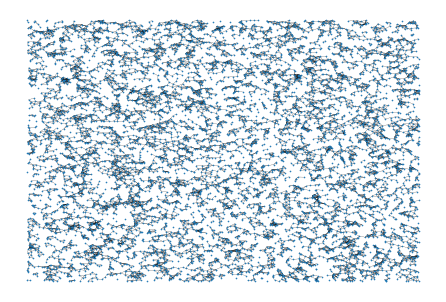

2.4440813064575195


In [71]:
start = time.time()
G = nx.Graph()
A.UploadEdges()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
nx.draw(G, pos, node_size=0.4, width=0.2)
plt.savefig("Initial.png") # save as png
plt.show() # display
print(time.time()-start)

### on fait évoluer notre graphe

In [72]:
start = time.time()
A.ProcessOfEvolution(ScoreMinimum, NombreIterations)
print(time.time()-start)

1 eme étape faite
2 eme étape faite
3 eme étape faite
640.1991457939148


### on affiche le nouveau graphe

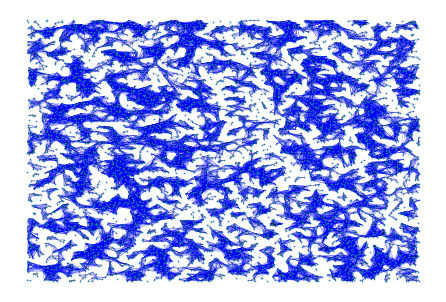

11.76672887802124


In [73]:
start = time.time()
A.UploadEdges()
A.AjoutCouleurs(A.EdgesType)
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.edges)
nx.draw(G, pos, node_size=0.4, width= 0.2, edge_color = list(A.EdgesColor))
plt.savefig("Final.png") # save as png
plt.show() # display
print(time.time()-start)

# propagation d'un virus 

la méthode utilisé sera de propager un virus en fixant chaque jour le taux de transmission, de façon à simuler un confinement ou un déconfinement?

### déconfinement brutal

In [242]:
l = []
for i in range(20):
    l.append(0.2)
for i in range(20):
    l.append(0.05)   
for i in range(20):
    l.append(0.05)
for i in range(40):
    l.append(0.2)

In [243]:
resultat=[A.PropagationVirus(l, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]


1 eme jours
1 personnes infectées
2 eme jours
3 personnes infectées
3 eme jours
5 personnes infectées
4 eme jours
8 personnes infectées
5 eme jours
11 personnes infectées
6 eme jours
20 personnes infectées
7 eme jours
30 personnes infectées
8 eme jours
41 personnes infectées
9 eme jours
58 personnes infectées
10 eme jours
80 personnes infectées
11 eme jours
106 personnes infectées
12 eme jours
131 personnes infectées
13 eme jours
152 personnes infectées
14 eme jours
166 personnes infectées
15 eme jours
193 personnes infectées
16 eme jours
210 personnes infectées
17 eme jours
234 personnes infectées
18 eme jours
258 personnes infectées
19 eme jours
284 personnes infectées
20 eme jours
309 personnes infectées
21 eme jours
369 personnes infectées
22 eme jours
445 personnes infectées
23 eme jours
518 personnes infectées
24 eme jours
583 personnes infectées
25 eme jours
625 personnes infectées
26 eme jours
697 personnes infectées
27 eme jours
806 personnes infectées
28 eme jours
938 personn

25 eme jours
510 personnes infectées
26 eme jours
585 personnes infectées
27 eme jours
680 personnes infectées
28 eme jours
781 personnes infectées
29 eme jours
888 personnes infectées
30 eme jours
999 personnes infectées
31 eme jours
1047 personnes infectées
32 eme jours
1125 personnes infectées
33 eme jours
1204 personnes infectées
34 eme jours
1302 personnes infectées
35 eme jours
1362 personnes infectées
36 eme jours
1376 personnes infectées
37 eme jours
1380 personnes infectées
38 eme jours
1371 personnes infectées
39 eme jours
1364 personnes infectées
40 eme jours
1314 personnes infectées
41 eme jours
1306 personnes infectées
42 eme jours
1312 personnes infectées
43 eme jours
1325 personnes infectées
44 eme jours
1297 personnes infectées
45 eme jours
1230 personnes infectées
46 eme jours
1198 personnes infectées
47 eme jours
1167 personnes infectées
48 eme jours
1142 personnes infectées
49 eme jours
1126 personnes infectées
50 eme jours
1161 personnes infectées
51 eme jours
1203 

47 eme jours
1179 personnes infectées
48 eme jours
1220 personnes infectées
49 eme jours
1222 personnes infectées
50 eme jours
1243 personnes infectées
51 eme jours
1285 personnes infectées
52 eme jours
1356 personnes infectées
53 eme jours
1375 personnes infectées
54 eme jours
1372 personnes infectées
55 eme jours
1346 personnes infectées
56 eme jours
1318 personnes infectées
57 eme jours
1265 personnes infectées
58 eme jours
1205 personnes infectées
59 eme jours
1182 personnes infectées
60 eme jours
1167 personnes infectées
61 eme jours
1141 personnes infectées
62 eme jours
1057 personnes infectées
63 eme jours
1061 personnes infectées
64 eme jours
1086 personnes infectées
65 eme jours
1100 personnes infectées
66 eme jours
1075 personnes infectées
67 eme jours
1070 personnes infectées
68 eme jours
1117 personnes infectées
69 eme jours
1159 personnes infectées
70 eme jours
1162 personnes infectées
71 eme jours
1163 personnes infectées
72 eme jours
1228 personnes infectées
73 eme jours

67 eme jours
1498 personnes infectées
68 eme jours
1462 personnes infectées
69 eme jours
1442 personnes infectées
70 eme jours
1446 personnes infectées
71 eme jours
1425 personnes infectées
72 eme jours
1391 personnes infectées
73 eme jours
1323 personnes infectées
74 eme jours
1216 personnes infectées
75 eme jours
1095 personnes infectées
76 eme jours
975 personnes infectées
77 eme jours
868 personnes infectées
78 eme jours
780 personnes infectées
79 eme jours
678 personnes infectées
80 eme jours
546 personnes infectées
81 eme jours
427 personnes infectées
82 eme jours
327 personnes infectées
83 eme jours
267 personnes infectées
84 eme jours
220 personnes infectées
85 eme jours
179 personnes infectées
86 eme jours
133 personnes infectées
87 eme jours
86 personnes infectées
88 eme jours
56 personnes infectées
89 eme jours
39 personnes infectées
90 eme jours
21 personnes infectées
91 eme jours
10 personnes infectées
92 eme jours
7 personnes infectées
93 eme jours
2 personnes infectées
9

1 eme jours
1 personnes infectées
2 eme jours
1 personnes infectées
3 eme jours
1 personnes infectées
4 eme jours
1 personnes infectées
5 eme jours
1 personnes infectées
6 eme jours
2 personnes infectées
7 eme jours
2 personnes infectées
8 eme jours
4 personnes infectées
9 eme jours
8 personnes infectées
10 eme jours
21 personnes infectées
11 eme jours
31 personnes infectées
12 eme jours
50 personnes infectées
13 eme jours
72 personnes infectées
14 eme jours
98 personnes infectées
15 eme jours
115 personnes infectées
16 eme jours
138 personnes infectées
17 eme jours
167 personnes infectées
18 eme jours
183 personnes infectées
19 eme jours
206 personnes infectées
20 eme jours
224 personnes infectées
21 eme jours
274 personnes infectées
22 eme jours
321 personnes infectées
23 eme jours
372 personnes infectées
24 eme jours
445 personnes infectées
25 eme jours
540 personnes infectées
26 eme jours
644 personnes infectées
27 eme jours
749 personnes infectées
28 eme jours
893 personnes infect

26 eme jours
536 personnes infectées
27 eme jours
569 personnes infectées
28 eme jours
591 personnes infectées
29 eme jours
616 personnes infectées
30 eme jours
658 personnes infectées
31 eme jours
674 personnes infectées
32 eme jours
725 personnes infectées
33 eme jours
819 personnes infectées
34 eme jours
879 personnes infectées
35 eme jours
915 personnes infectées
36 eme jours
928 personnes infectées
37 eme jours
961 personnes infectées
38 eme jours
981 personnes infectées
39 eme jours
999 personnes infectées
40 eme jours
996 personnes infectées
41 eme jours
999 personnes infectées
42 eme jours
991 personnes infectées
43 eme jours
940 personnes infectées
44 eme jours
897 personnes infectées
45 eme jours
899 personnes infectées
46 eme jours
899 personnes infectées
47 eme jours
899 personnes infectées
48 eme jours
895 personnes infectées
49 eme jours
882 personnes infectées
50 eme jours
930 personnes infectées
51 eme jours
1023 personnes infectées
52 eme jours
1147 personnes infectées

48 eme jours
1148 personnes infectées
49 eme jours
1249 personnes infectées
50 eme jours
1314 personnes infectées
51 eme jours
1344 personnes infectées
52 eme jours
1386 personnes infectées
53 eme jours
1414 personnes infectées
54 eme jours
1386 personnes infectées
55 eme jours
1331 personnes infectées
56 eme jours
1313 personnes infectées
57 eme jours
1335 personnes infectées
58 eme jours
1394 personnes infectées
59 eme jours
1488 personnes infectées
60 eme jours
1590 personnes infectées
61 eme jours
1683 personnes infectées
62 eme jours
1691 personnes infectées
63 eme jours
1676 personnes infectées
64 eme jours
1688 personnes infectées
65 eme jours
1733 personnes infectées
66 eme jours
1784 personnes infectées
67 eme jours
1801 personnes infectées
68 eme jours
1746 personnes infectées
69 eme jours
1653 personnes infectées
70 eme jours
1578 personnes infectées
71 eme jours
1478 personnes infectées
72 eme jours
1412 personnes infectées
73 eme jours
1325 personnes infectées
74 eme jours

69 eme jours
2081 personnes infectées
70 eme jours
2213 personnes infectées
71 eme jours
2286 personnes infectées
72 eme jours
2336 personnes infectées
73 eme jours
2406 personnes infectées
74 eme jours
2455 personnes infectées
75 eme jours
2453 personnes infectées
76 eme jours
2388 personnes infectées
77 eme jours
2310 personnes infectées
78 eme jours
2260 personnes infectées
79 eme jours
2209 personnes infectées
80 eme jours
2061 personnes infectées
81 eme jours
1884 personnes infectées
82 eme jours
1638 personnes infectées
83 eme jours
1395 personnes infectées
84 eme jours
1204 personnes infectées
85 eme jours
1040 personnes infectées
86 eme jours
886 personnes infectées
87 eme jours
722 personnes infectées
88 eme jours
585 personnes infectées
89 eme jours
468 personnes infectées
90 eme jours
404 personnes infectées
91 eme jours
358 personnes infectées
92 eme jours
344 personnes infectées
93 eme jours
334 personnes infectées
94 eme jours
308 personnes infectées
95 eme jours
279 pers

90 eme jours
932 personnes infectées
91 eme jours
812 personnes infectées
92 eme jours
724 personnes infectées
93 eme jours
644 personnes infectées
94 eme jours
541 personnes infectées
95 eme jours
452 personnes infectées
96 eme jours
403 personnes infectées
97 eme jours
356 personnes infectées
98 eme jours
318 personnes infectées
99 eme jours
306 personnes infectées
100 eme jours
281 personnes infectées
1 eme jours
4 personnes infectées
2 eme jours
10 personnes infectées
3 eme jours
21 personnes infectées
4 eme jours
35 personnes infectées
5 eme jours
54 personnes infectées
6 eme jours
72 personnes infectées
7 eme jours
95 personnes infectées
8 eme jours
126 personnes infectées
9 eme jours
159 personnes infectées
10 eme jours
184 personnes infectées
11 eme jours
208 personnes infectées
12 eme jours
229 personnes infectées
13 eme jours
243 personnes infectées
14 eme jours
250 personnes infectées
15 eme jours
256 personnes infectées
16 eme jours
265 personnes infectées
17 eme jours
277 

In [244]:
l2=[]
for i in range(20):
    l2.append(0.2)
for i in range(20):
    l2.append(0.05)
for i in range(60):
    l2.append(0.2)

In [245]:
resultat2=[A.PropagationVirus(l2, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]

1 eme jours
1 personnes infectées
2 eme jours
2 personnes infectées
3 eme jours
4 personnes infectées
4 eme jours
7 personnes infectées
5 eme jours
12 personnes infectées
6 eme jours
25 personnes infectées
7 eme jours
44 personnes infectées
8 eme jours
63 personnes infectées
9 eme jours
88 personnes infectées
10 eme jours
115 personnes infectées
11 eme jours
143 personnes infectées
12 eme jours
178 personnes infectées
13 eme jours
205 personnes infectées
14 eme jours
235 personnes infectées
15 eme jours
261 personnes infectées
16 eme jours
288 personnes infectées
17 eme jours
314 personnes infectées
18 eme jours
347 personnes infectées
19 eme jours
392 personnes infectées
20 eme jours
417 personnes infectées
21 eme jours
442 personnes infectées
22 eme jours
463 personnes infectées
23 eme jours
492 personnes infectées
24 eme jours
535 personnes infectées
25 eme jours
588 personnes infectées
26 eme jours
649 personnes infectées
27 eme jours
690 personnes infectées
28 eme jours
735 person

23 eme jours
342 personnes infectées
24 eme jours
335 personnes infectées
25 eme jours
326 personnes infectées
26 eme jours
316 personnes infectées
27 eme jours
312 personnes infectées
28 eme jours
303 personnes infectées
29 eme jours
306 personnes infectées
30 eme jours
334 personnes infectées
31 eme jours
359 personnes infectées
32 eme jours
411 personnes infectées
33 eme jours
452 personnes infectées
34 eme jours
500 personnes infectées
35 eme jours
534 personnes infectées
36 eme jours
581 personnes infectées
37 eme jours
632 personnes infectées
38 eme jours
681 personnes infectées
39 eme jours
724 personnes infectées
40 eme jours
739 personnes infectées
41 eme jours
849 personnes infectées
42 eme jours
938 personnes infectées
43 eme jours
1054 personnes infectées
44 eme jours
1125 personnes infectées
45 eme jours
1206 personnes infectées
46 eme jours
1313 personnes infectées
47 eme jours
1415 personnes infectées
48 eme jours
1507 personnes infectées
49 eme jours
1604 personnes infe

46 eme jours
848 personnes infectées
47 eme jours
955 personnes infectées
48 eme jours
1091 personnes infectées
49 eme jours
1212 personnes infectées
50 eme jours
1353 personnes infectées
51 eme jours
1379 personnes infectées
52 eme jours
1465 personnes infectées
53 eme jours
1530 personnes infectées
54 eme jours
1582 personnes infectées
55 eme jours
1635 personnes infectées
56 eme jours
1613 personnes infectées
57 eme jours
1597 personnes infectées
58 eme jours
1562 personnes infectées
59 eme jours
1518 personnes infectées
60 eme jours
1447 personnes infectées
61 eme jours
1392 personnes infectées
62 eme jours
1350 personnes infectées
63 eme jours
1255 personnes infectées
64 eme jours
1195 personnes infectées
65 eme jours
1195 personnes infectées
66 eme jours
1239 personnes infectées
67 eme jours
1248 personnes infectées
68 eme jours
1251 personnes infectées
69 eme jours
1253 personnes infectées
70 eme jours
1268 personnes infectées
71 eme jours
1277 personnes infectées
72 eme jours
1

66 eme jours
1326 personnes infectées
67 eme jours
1365 personnes infectées
68 eme jours
1480 personnes infectées
69 eme jours
1601 personnes infectées
70 eme jours
1698 personnes infectées
71 eme jours
1757 personnes infectées
72 eme jours
1802 personnes infectées
73 eme jours
1766 personnes infectées
74 eme jours
1677 personnes infectées
75 eme jours
1563 personnes infectées
76 eme jours
1456 personnes infectées
77 eme jours
1327 personnes infectées
78 eme jours
1162 personnes infectées
79 eme jours
982 personnes infectées
80 eme jours
792 personnes infectées
81 eme jours
616 personnes infectées
82 eme jours
461 personnes infectées
83 eme jours
355 personnes infectées
84 eme jours
298 personnes infectées
85 eme jours
245 personnes infectées
86 eme jours
208 personnes infectées
87 eme jours
187 personnes infectées
88 eme jours
158 personnes infectées
89 eme jours
131 personnes infectées
90 eme jours
105 personnes infectées
91 eme jours
75 personnes infectées
92 eme jours
55 personnes 

90 eme jours
119 personnes infectées
91 eme jours
90 personnes infectées
92 eme jours
62 personnes infectées
93 eme jours
38 personnes infectées
94 eme jours
17 personnes infectées
95 eme jours
6 personnes infectées
96 eme jours
3 personnes infectées
97 eme jours
3 personnes infectées
98 eme jours
4 personnes infectées
99 eme jours
5 personnes infectées
100 eme jours
4 personnes infectées
1 eme jours
2 personnes infectées
2 eme jours
2 personnes infectées
3 eme jours
2 personnes infectées
4 eme jours
3 personnes infectées
5 eme jours
3 personnes infectées
6 eme jours
5 personnes infectées
7 eme jours
11 personnes infectées
8 eme jours
20 personnes infectées
9 eme jours
42 personnes infectées
10 eme jours
63 personnes infectées
11 eme jours
76 personnes infectées
12 eme jours
92 personnes infectées
13 eme jours
111 personnes infectées
14 eme jours
127 personnes infectées
15 eme jours
149 personnes infectées
16 eme jours
167 personnes infectées
17 eme jours
179 personnes infectées
18 eme

28 eme jours
476 personnes infectées
29 eme jours
489 personnes infectées
30 eme jours
490 personnes infectées
31 eme jours
488 personnes infectées
32 eme jours
469 personnes infectées
33 eme jours
470 personnes infectées
34 eme jours
455 personnes infectées
35 eme jours
456 personnes infectées
36 eme jours
442 personnes infectées
37 eme jours
421 personnes infectées
38 eme jours
411 personnes infectées
39 eme jours
395 personnes infectées
40 eme jours
381 personnes infectées
41 eme jours
397 personnes infectées
42 eme jours
427 personnes infectées
43 eme jours
425 personnes infectées
44 eme jours
434 personnes infectées
45 eme jours
468 personnes infectées
46 eme jours
534 personnes infectées
47 eme jours
628 personnes infectées
48 eme jours
724 personnes infectées
49 eme jours
796 personnes infectées
50 eme jours
848 personnes infectées
51 eme jours
857 personnes infectées
52 eme jours
886 personnes infectées
53 eme jours
957 personnes infectées
54 eme jours
1032 personnes infectées


50 eme jours
1087 personnes infectées
51 eme jours
1174 personnes infectées
52 eme jours
1272 personnes infectées
53 eme jours
1353 personnes infectées
54 eme jours
1418 personnes infectées
55 eme jours
1465 personnes infectées
56 eme jours
1470 personnes infectées
57 eme jours
1468 personnes infectées
58 eme jours
1492 personnes infectées
59 eme jours
1505 personnes infectées
60 eme jours
1486 personnes infectées
61 eme jours
1476 personnes infectées
62 eme jours
1436 personnes infectées
63 eme jours
1436 personnes infectées
64 eme jours
1448 personnes infectées
65 eme jours
1462 personnes infectées
66 eme jours
1511 personnes infectées
67 eme jours
1603 personnes infectées
68 eme jours
1655 personnes infectées
69 eme jours
1673 personnes infectées
70 eme jours
1726 personnes infectées
71 eme jours
1716 personnes infectées
72 eme jours
1749 personnes infectées
73 eme jours
1788 personnes infectées
74 eme jours
1846 personnes infectées
75 eme jours
1860 personnes infectées
76 eme jours

71 eme jours
2459 personnes infectées
72 eme jours
2521 personnes infectées
73 eme jours
2521 personnes infectées
74 eme jours
2513 personnes infectées
75 eme jours
2436 personnes infectées
76 eme jours
2336 personnes infectées
77 eme jours
2236 personnes infectées
78 eme jours
2177 personnes infectées
79 eme jours
2076 personnes infectées
80 eme jours
1895 personnes infectées
81 eme jours
1676 personnes infectées
82 eme jours
1463 personnes infectées
83 eme jours
1273 personnes infectées
84 eme jours
1132 personnes infectées
85 eme jours
1043 personnes infectées
86 eme jours
947 personnes infectées
87 eme jours
845 personnes infectées
88 eme jours
740 personnes infectées
89 eme jours
631 personnes infectées
90 eme jours
508 personnes infectées
91 eme jours
429 personnes infectées
92 eme jours
404 personnes infectées
93 eme jours
376 personnes infectées
94 eme jours
340 personnes infectées
95 eme jours
282 personnes infectées
96 eme jours
241 personnes infectées
97 eme jours
205 person

92 eme jours
853 personnes infectées
93 eme jours
789 personnes infectées
94 eme jours
735 personnes infectées
95 eme jours
728 personnes infectées
96 eme jours
713 personnes infectées
97 eme jours
703 personnes infectées
98 eme jours
679 personnes infectées
99 eme jours
650 personnes infectées
100 eme jours
602 personnes infectées
1 eme jours
1 personnes infectées
2 eme jours
6 personnes infectées
3 eme jours
13 personnes infectées
4 eme jours
29 personnes infectées
5 eme jours
38 personnes infectées
6 eme jours
57 personnes infectées
7 eme jours
72 personnes infectées
8 eme jours
90 personnes infectées
9 eme jours
115 personnes infectées
10 eme jours
138 personnes infectées
11 eme jours
169 personnes infectées
12 eme jours
190 personnes infectées
13 eme jours
215 personnes infectées
14 eme jours
232 personnes infectées
15 eme jours
260 personnes infectées
16 eme jours
281 personnes infectées
17 eme jours
302 personnes infectées
18 eme jours
336 personnes infectées
19 eme jours
360 pe

In [246]:
resultat_bis = []
for i in range(len(resultat[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat)):
        NombreInfectes += resultat[j][i][1]
        NombreAffectees += resultat[j][i][2]
        NombreMorts += resultat[j][i][4]
        
    resultat_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat = resultat_bis

In [247]:
resultat2_bis = []
for i in range(len(resultat2[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat2)):
        NombreInfectes += resultat2[j][i][1]
        NombreAffectees += resultat2[j][i][2]
        NombreMorts += resultat2[j][i][4]
        
    resultat2_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat2 = resultat2_bis

In [248]:
NombrePersonnesTouchees2 = []
NombrePersonnesAffectees2 = []
NombrePersonnesMortes2 = []
maxi2 = 0
for jour in resultat2:
    NombrePersonnesTouchees2.append(jour[1])
    NombrePersonnesAffectees2.append(jour[2])
    NombrePersonnesMortes2.append(jour[4])
    if maxi2 < jour[2]:
        maxi2 = jour[2]      
Mesures2 = []
for i in l2:
    Mesures2.append(i*100)
Mesures2.append(Mesures2[-1])

In [249]:
NombrePersonnesTouchees = []
NombrePersonnesAffectees = []
NombrePersonnesMortes = []
maxi = 0
jours = []
for jour in resultat:
    NombrePersonnesTouchees.append(jour[1])
    NombrePersonnesAffectees.append(jour[2])
    NombrePersonnesMortes.append(jour[4])
    if maxi < jour[2]:
        maxi = jour[2]      
    jours.append(jour[0])
Mesures = []
for i in l:
    Mesures.append(i*100)
Mesures.append(Mesures[-1])

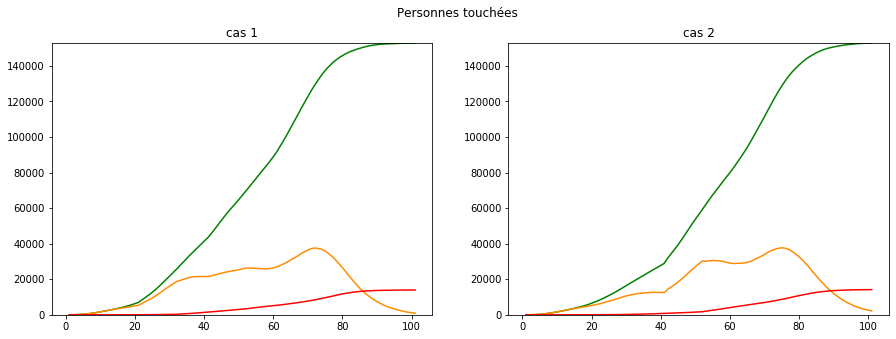

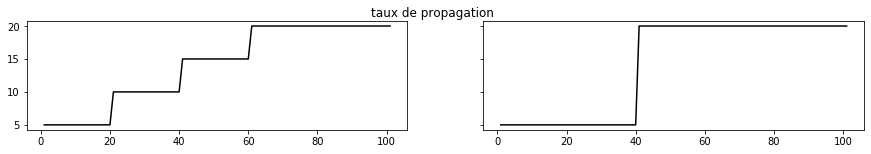

In [256]:
maxif = max(maxi, maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, NombrePersonnesAffectees, color='green', linestyle='solid')
ax1.plot(jours, NombrePersonnesTouchees, color='darkorange', linestyle='solid')
ax1.plot(jours, NombrePersonnesMortes, color='r', linestyle='solid')
ax1.set_ylim([0, maxif])
ax2.plot(jours, NombrePersonnesAffectees2, color='green', linestyle='solid')
ax2.plot(jours, NombrePersonnesTouchees2, color='darkorange', linestyle='solid')
ax2.plot(jours, NombrePersonnesMortes2, color='r', linestyle='solid')
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()

In [251]:
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

1er cas: 13945 morts
2e cas: 14149 morts


### approximation polynomiale pour montrer nos résultats à la télé

In [271]:
Aff = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees, 15))
Touchees = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees, 15))
Mortes = np.poly1d(np.polyfit(jours,NombrePersonnesMortes, 15))
Aff2 = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees2, 15))
Touchees2 = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees2, 15))
Mortes2 = np.poly1d(np.polyfit(jours,NombrePersonnesMortes2, 15))

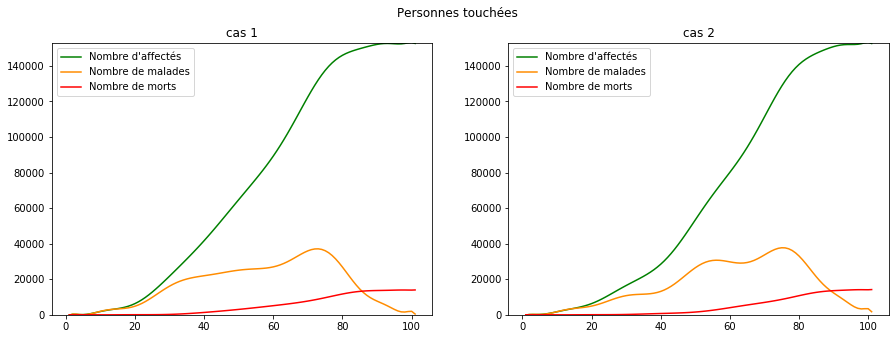

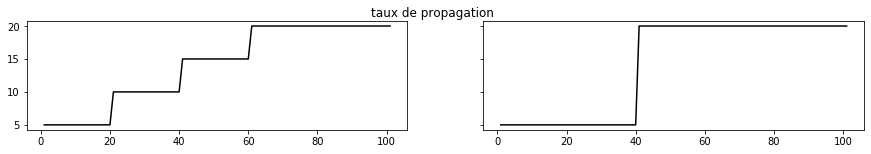

1er cas: 13945 morts
2e cas: 14149 morts


In [278]:
maxif = max(maxi, maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, Aff(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax1.plot(jours, Touchees(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax1.plot(jours, Mortes(jours), color='r', linestyle='solid', label="Nombre de morts")
ax1.set_ylim([0,maxif])
ax2.plot(jours, Aff2(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax2.plot(jours, Touchees2(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax2.plot(jours, Mortes2(jours), color='r', linestyle='solid', label="Nombre de morts")
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 
ax1.legend()
ax2.legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

### retard de confinement

In [298]:
l=[]
for i in range(20):
    l.append(0.2)
for i in range(80):
    l.append(0.05)

In [299]:
resultat = [A.PropagationVirus(l, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]

1 eme jours
2 personnes infectées
2 eme jours
10 personnes infectées
3 eme jours
34 personnes infectées
4 eme jours
78 personnes infectées
5 eme jours
131 personnes infectées
6 eme jours
184 personnes infectées
7 eme jours
256 personnes infectées
8 eme jours
347 personnes infectées
9 eme jours
466 personnes infectées
10 eme jours
556 personnes infectées
11 eme jours
655 personnes infectées
12 eme jours
780 personnes infectées
13 eme jours
946 personnes infectées
14 eme jours
1142 personnes infectées
15 eme jours
1282 personnes infectées
16 eme jours
1384 personnes infectées
17 eme jours
1491 personnes infectées
18 eme jours
1574 personnes infectées
19 eme jours
1619 personnes infectées
20 eme jours
1699 personnes infectées
21 eme jours
1672 personnes infectées
22 eme jours
1611 personnes infectées
23 eme jours
1494 personnes infectées
24 eme jours
1319 personnes infectées
25 eme jours
1188 personnes infectées
26 eme jours
1101 personnes infectées
27 eme jours
981 personnes infectées
28

23 eme jours
1207 personnes infectées
24 eme jours
1190 personnes infectées
25 eme jours
1171 personnes infectées
26 eme jours
1113 personnes infectées
27 eme jours
1028 personnes infectées
28 eme jours
966 personnes infectées
29 eme jours
870 personnes infectées
30 eme jours
802 personnes infectées
31 eme jours
798 personnes infectées
32 eme jours
772 personnes infectées
33 eme jours
767 personnes infectées
34 eme jours
742 personnes infectées
35 eme jours
717 personnes infectées
36 eme jours
690 personnes infectées
37 eme jours
657 personnes infectées
38 eme jours
631 personnes infectées
39 eme jours
657 personnes infectées
40 eme jours
681 personnes infectées
41 eme jours
707 personnes infectées
42 eme jours
729 personnes infectées
43 eme jours
731 personnes infectées
44 eme jours
745 personnes infectées
45 eme jours
763 personnes infectées
46 eme jours
751 personnes infectées
47 eme jours
751 personnes infectées
48 eme jours
726 personnes infectées
49 eme jours
678 personnes infect

45 eme jours
702 personnes infectées
46 eme jours
704 personnes infectées
47 eme jours
695 personnes infectées
48 eme jours
686 personnes infectées
49 eme jours
694 personnes infectées
50 eme jours
684 personnes infectées
51 eme jours
646 personnes infectées
52 eme jours
631 personnes infectées
53 eme jours
616 personnes infectées
54 eme jours
617 personnes infectées
55 eme jours
612 personnes infectées
56 eme jours
586 personnes infectées
57 eme jours
562 personnes infectées
58 eme jours
531 personnes infectées
59 eme jours
488 personnes infectées
60 eme jours
467 personnes infectées
61 eme jours
470 personnes infectées
62 eme jours
462 personnes infectées
63 eme jours
457 personnes infectées
64 eme jours
443 personnes infectées
65 eme jours
435 personnes infectées
66 eme jours
413 personnes infectées
67 eme jours
391 personnes infectées
68 eme jours
369 personnes infectées
69 eme jours
356 personnes infectées
70 eme jours
350 personnes infectées
71 eme jours
340 personnes infectées
7

67 eme jours
705 personnes infectées
68 eme jours
703 personnes infectées
69 eme jours
724 personnes infectées
70 eme jours
753 personnes infectées
71 eme jours
770 personnes infectées
72 eme jours
786 personnes infectées
73 eme jours
793 personnes infectées
74 eme jours
787 personnes infectées
75 eme jours
763 personnes infectées
76 eme jours
739 personnes infectées
77 eme jours
726 personnes infectées
78 eme jours
716 personnes infectées
79 eme jours
676 personnes infectées
80 eme jours
625 personnes infectées
81 eme jours
566 personnes infectées
82 eme jours
504 personnes infectées
83 eme jours
440 personnes infectées
84 eme jours
380 personnes infectées
85 eme jours
340 personnes infectées
86 eme jours
305 personnes infectées
87 eme jours
285 personnes infectées
88 eme jours
268 personnes infectées
89 eme jours
254 personnes infectées
90 eme jours
236 personnes infectées
91 eme jours
222 personnes infectées
92 eme jours
204 personnes infectées
93 eme jours
188 personnes infectées
9

88 eme jours
548 personnes infectées
89 eme jours
527 personnes infectées
90 eme jours
498 personnes infectées
91 eme jours
453 personnes infectées
92 eme jours
415 personnes infectées
93 eme jours
379 personnes infectées
94 eme jours
331 personnes infectées
95 eme jours
300 personnes infectées
96 eme jours
264 personnes infectées
97 eme jours
226 personnes infectées
98 eme jours
187 personnes infectées
99 eme jours
158 personnes infectées
100 eme jours
125 personnes infectées
1 eme jours
2 personnes infectées
2 eme jours
5 personnes infectées
3 eme jours
20 personnes infectées
4 eme jours
56 personnes infectées
5 eme jours
118 personnes infectées
6 eme jours
207 personnes infectées
7 eme jours
293 personnes infectées
8 eme jours
384 personnes infectées
9 eme jours
484 personnes infectées
10 eme jours
603 personnes infectées
11 eme jours
728 personnes infectées
12 eme jours
852 personnes infectées
13 eme jours
980 personnes infectées
14 eme jours
1106 personnes infectées
15 eme jours
1

12 eme jours
797 personnes infectées
13 eme jours
897 personnes infectées
14 eme jours
966 personnes infectées
15 eme jours
1042 personnes infectées
16 eme jours
1113 personnes infectées
17 eme jours
1151 personnes infectées
18 eme jours
1173 personnes infectées
19 eme jours
1127 personnes infectées
20 eme jours
1067 personnes infectées
21 eme jours
944 personnes infectées
22 eme jours
832 personnes infectées
23 eme jours
775 personnes infectées
24 eme jours
751 personnes infectées
25 eme jours
698 personnes infectées
26 eme jours
639 personnes infectées
27 eme jours
579 personnes infectées
28 eme jours
514 personnes infectées
29 eme jours
479 personnes infectées
30 eme jours
441 personnes infectées
31 eme jours
440 personnes infectées
32 eme jours
432 personnes infectées
33 eme jours
411 personnes infectées
34 eme jours
382 personnes infectées
35 eme jours
360 personnes infectées
36 eme jours
353 personnes infectées
37 eme jours
350 personnes infectées
38 eme jours
363 personnes infec

612 personnes infectées
35 eme jours
626 personnes infectées
36 eme jours
650 personnes infectées
37 eme jours
661 personnes infectées
38 eme jours
665 personnes infectées
39 eme jours
673 personnes infectées
40 eme jours
675 personnes infectées
41 eme jours
677 personnes infectées
42 eme jours
651 personnes infectées
43 eme jours
634 personnes infectées
44 eme jours
625 personnes infectées
45 eme jours
658 personnes infectées
46 eme jours
674 personnes infectées
47 eme jours
681 personnes infectées
48 eme jours
691 personnes infectées
49 eme jours
696 personnes infectées
50 eme jours
691 personnes infectées
51 eme jours
673 personnes infectées
52 eme jours
675 personnes infectées
53 eme jours
666 personnes infectées
54 eme jours
641 personnes infectées
55 eme jours
604 personnes infectées
56 eme jours
574 personnes infectées
57 eme jours
576 personnes infectées
58 eme jours
582 personnes infectées
59 eme jours
592 personnes infectées
60 eme jours
611 personnes infectées
61 eme jours
6

57 eme jours
455 personnes infectées
58 eme jours
438 personnes infectées
59 eme jours
437 personnes infectées
60 eme jours
422 personnes infectées
61 eme jours
433 personnes infectées
62 eme jours
438 personnes infectées
63 eme jours
457 personnes infectées
64 eme jours
478 personnes infectées
65 eme jours
489 personnes infectées
66 eme jours
489 personnes infectées
67 eme jours
465 personnes infectées
68 eme jours
433 personnes infectées
69 eme jours
405 personnes infectées
70 eme jours
394 personnes infectées
71 eme jours
392 personnes infectées
72 eme jours
386 personnes infectées
73 eme jours
386 personnes infectées
74 eme jours
389 personnes infectées
75 eme jours
395 personnes infectées
76 eme jours
416 personnes infectées
77 eme jours
486 personnes infectées
78 eme jours
556 personnes infectées
79 eme jours
619 personnes infectées
80 eme jours
699 personnes infectées
81 eme jours
777 personnes infectées
82 eme jours
862 personnes infectées
83 eme jours
930 personnes infectées
8

79 eme jours
282 personnes infectées
80 eme jours
289 personnes infectées
81 eme jours
291 personnes infectées
82 eme jours
306 personnes infectées
83 eme jours
298 personnes infectées
84 eme jours
289 personnes infectées
85 eme jours
287 personnes infectées
86 eme jours
294 personnes infectées
87 eme jours
303 personnes infectées
88 eme jours
317 personnes infectées
89 eme jours
327 personnes infectées
90 eme jours
323 personnes infectées
91 eme jours
330 personnes infectées
92 eme jours
328 personnes infectées
93 eme jours
341 personnes infectées
94 eme jours
347 personnes infectées
95 eme jours
343 personnes infectées
96 eme jours
335 personnes infectées
97 eme jours
317 personnes infectées
98 eme jours
317 personnes infectées
99 eme jours
322 personnes infectées
100 eme jours
343 personnes infectées
1 eme jours
5 personnes infectées
2 eme jours
29 personnes infectées
3 eme jours
60 personnes infectées
4 eme jours
95 personnes infectées
5 eme jours
151 personnes infectées
6 eme jour

In [300]:
l2=[]
for i in range(40):
    l2.append(0.2)
for i in range(60):
    l2.append(0.05)

In [301]:
resultat2 = [A.PropagationVirus(l2, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]

1 eme jours
8 personnes infectées
2 eme jours
30 personnes infectées
3 eme jours
63 personnes infectées
4 eme jours
104 personnes infectées
5 eme jours
163 personnes infectées
6 eme jours
230 personnes infectées
7 eme jours
288 personnes infectées
8 eme jours
358 personnes infectées
9 eme jours
471 personnes infectées
10 eme jours
609 personnes infectées
11 eme jours
755 personnes infectées
12 eme jours
871 personnes infectées
13 eme jours
983 personnes infectées
14 eme jours
1109 personnes infectées
15 eme jours
1217 personnes infectées
16 eme jours
1337 personnes infectées
17 eme jours
1426 personnes infectées
18 eme jours
1511 personnes infectées
19 eme jours
1553 personnes infectées
20 eme jours
1613 personnes infectées
21 eme jours
1634 personnes infectées
22 eme jours
1616 personnes infectées
23 eme jours
1600 personnes infectées
24 eme jours
1595 personnes infectées
25 eme jours
1621 personnes infectées
26 eme jours
1635 personnes infectées
27 eme jours
1665 personnes infectées


23 eme jours
1848 personnes infectées
24 eme jours
1804 personnes infectées
25 eme jours
1756 personnes infectées
26 eme jours
1722 personnes infectées
27 eme jours
1636 personnes infectées
28 eme jours
1581 personnes infectées
29 eme jours
1556 personnes infectées
30 eme jours
1498 personnes infectées
31 eme jours
1417 personnes infectées
32 eme jours
1325 personnes infectées
33 eme jours
1291 personnes infectées
34 eme jours
1279 personnes infectées
35 eme jours
1277 personnes infectées
36 eme jours
1241 personnes infectées
37 eme jours
1180 personnes infectées
38 eme jours
1083 personnes infectées
39 eme jours
1014 personnes infectées
40 eme jours
963 personnes infectées
41 eme jours
852 personnes infectées
42 eme jours
765 personnes infectées
43 eme jours
677 personnes infectées
44 eme jours
612 personnes infectées
45 eme jours
570 personnes infectées
46 eme jours
580 personnes infectées
47 eme jours
592 personnes infectées
48 eme jours
608 personnes infectées
49 eme jours
585 pers

44 eme jours
871 personnes infectées
45 eme jours
810 personnes infectées
46 eme jours
774 personnes infectées
47 eme jours
711 personnes infectées
48 eme jours
644 personnes infectées
49 eme jours
571 personnes infectées
50 eme jours
513 personnes infectées
51 eme jours
535 personnes infectées
52 eme jours
542 personnes infectées
53 eme jours
545 personnes infectées
54 eme jours
560 personnes infectées
55 eme jours
563 personnes infectées
56 eme jours
554 personnes infectées
57 eme jours
567 personnes infectées
58 eme jours
563 personnes infectées
59 eme jours
567 personnes infectées
60 eme jours
588 personnes infectées
61 eme jours
603 personnes infectées
62 eme jours
626 personnes infectées
63 eme jours
643 personnes infectées
64 eme jours
640 personnes infectées
65 eme jours
655 personnes infectées
66 eme jours
689 personnes infectées
67 eme jours
698 personnes infectées
68 eme jours
709 personnes infectées
69 eme jours
707 personnes infectées
70 eme jours
690 personnes infectées
7

65 eme jours
405 personnes infectées
66 eme jours
363 personnes infectées
67 eme jours
323 personnes infectées
68 eme jours
282 personnes infectées
69 eme jours
257 personnes infectées
70 eme jours
232 personnes infectées
71 eme jours
210 personnes infectées
72 eme jours
186 personnes infectées
73 eme jours
170 personnes infectées
74 eme jours
161 personnes infectées
75 eme jours
149 personnes infectées
76 eme jours
135 personnes infectées
77 eme jours
128 personnes infectées
78 eme jours
125 personnes infectées
79 eme jours
117 personnes infectées
80 eme jours
107 personnes infectées
81 eme jours
102 personnes infectées
82 eme jours
89 personnes infectées
83 eme jours
77 personnes infectées
84 eme jours
75 personnes infectées
85 eme jours
76 personnes infectées
86 eme jours
76 personnes infectées
87 eme jours
73 personnes infectées
88 eme jours
65 personnes infectées
89 eme jours
62 personnes infectées
90 eme jours
58 personnes infectées
91 eme jours
47 personnes infectées
92 eme jour

87 eme jours
83 personnes infectées
88 eme jours
73 personnes infectées
89 eme jours
65 personnes infectées
90 eme jours
54 personnes infectées
91 eme jours
48 personnes infectées
92 eme jours
38 personnes infectées
93 eme jours
31 personnes infectées
94 eme jours
26 personnes infectées
95 eme jours
16 personnes infectées
96 eme jours
12 personnes infectées
97 eme jours
13 personnes infectées
98 eme jours
12 personnes infectées
99 eme jours
9 personnes infectées
100 eme jours
7 personnes infectées
1 eme jours
1 personnes infectées
2 eme jours
1 personnes infectées
3 eme jours
4 personnes infectées
4 eme jours
12 personnes infectées
5 eme jours
36 personnes infectées
6 eme jours
88 personnes infectées
7 eme jours
168 personnes infectées
8 eme jours
252 personnes infectées
9 eme jours
338 personnes infectées
10 eme jours
433 personnes infectées
11 eme jours
548 personnes infectées
12 eme jours
688 personnes infectées
13 eme jours
831 personnes infectées
14 eme jours
1007 personnes infect

13 eme jours
719 personnes infectées
14 eme jours
823 personnes infectées
15 eme jours
930 personnes infectées
16 eme jours
1031 personnes infectées
17 eme jours
1106 personnes infectées
18 eme jours
1131 personnes infectées
19 eme jours
1128 personnes infectées
20 eme jours
1121 personnes infectées
21 eme jours
1100 personnes infectées
22 eme jours
1102 personnes infectées
23 eme jours
1070 personnes infectées
24 eme jours
1021 personnes infectées
25 eme jours
951 personnes infectées
26 eme jours
913 personnes infectées
27 eme jours
878 personnes infectées
28 eme jours
865 personnes infectées
29 eme jours
845 personnes infectées
30 eme jours
839 personnes infectées
31 eme jours
857 personnes infectées
32 eme jours
869 personnes infectées
33 eme jours
921 personnes infectées
34 eme jours
955 personnes infectées
35 eme jours
1003 personnes infectées
36 eme jours
1027 personnes infectées
37 eme jours
1120 personnes infectées
38 eme jours
1187 personnes infectées
39 eme jours
1263 personn

33 eme jours
1373 personnes infectées
34 eme jours
1478 personnes infectées
35 eme jours
1502 personnes infectées
36 eme jours
1491 personnes infectées
37 eme jours
1473 personnes infectées
38 eme jours
1453 personnes infectées
39 eme jours
1510 personnes infectées
40 eme jours
1563 personnes infectées
41 eme jours
1514 personnes infectées
42 eme jours
1464 personnes infectées
43 eme jours
1387 personnes infectées
44 eme jours
1247 personnes infectées
45 eme jours
1168 personnes infectées
46 eme jours
1132 personnes infectées
47 eme jours
1084 personnes infectées
48 eme jours
1033 personnes infectées
49 eme jours
914 personnes infectées
50 eme jours
806 personnes infectées
51 eme jours
801 personnes infectées
52 eme jours
807 personnes infectées
53 eme jours
828 personnes infectées
54 eme jours
837 personnes infectées
55 eme jours
827 personnes infectées
56 eme jours
812 personnes infectées
57 eme jours
785 personnes infectées
58 eme jours
760 personnes infectées
59 eme jours
750 perso

54 eme jours
1081 personnes infectées
55 eme jours
1048 personnes infectées
56 eme jours
1015 personnes infectées
57 eme jours
1007 personnes infectées
58 eme jours
986 personnes infectées
59 eme jours
991 personnes infectées
60 eme jours
956 personnes infectées
61 eme jours
955 personnes infectées
62 eme jours
938 personnes infectées
63 eme jours
944 personnes infectées
64 eme jours
986 personnes infectées
65 eme jours
1016 personnes infectées
66 eme jours
1060 personnes infectées
67 eme jours
1086 personnes infectées
68 eme jours
1137 personnes infectées
69 eme jours
1185 personnes infectées
70 eme jours
1206 personnes infectées
71 eme jours
1172 personnes infectées
72 eme jours
1146 personnes infectées
73 eme jours
1121 personnes infectées
74 eme jours
1086 personnes infectées
75 eme jours
1066 personnes infectées
76 eme jours
1026 personnes infectées
77 eme jours
975 personnes infectées
78 eme jours
898 personnes infectées
79 eme jours
796 personnes infectées
80 eme jours
696 perso

75 eme jours
401 personnes infectées
76 eme jours
415 personnes infectées
77 eme jours
433 personnes infectées
78 eme jours
467 personnes infectées
79 eme jours
484 personnes infectées
80 eme jours
500 personnes infectées
81 eme jours
506 personnes infectées
82 eme jours
496 personnes infectées
83 eme jours
487 personnes infectées
84 eme jours
479 personnes infectées
85 eme jours
456 personnes infectées
86 eme jours
429 personnes infectées
87 eme jours
403 personnes infectées
88 eme jours
365 personnes infectées
89 eme jours
356 personnes infectées
90 eme jours
349 personnes infectées
91 eme jours
352 personnes infectées
92 eme jours
377 personnes infectées
93 eme jours
397 personnes infectées
94 eme jours
415 personnes infectées
95 eme jours
424 personnes infectées
96 eme jours
428 personnes infectées
97 eme jours
422 personnes infectées
98 eme jours
411 personnes infectées
99 eme jours
391 personnes infectées
100 eme jours
379 personnes infectées
1 eme jours
10 personnes infectées
2 

96 eme jours
165 personnes infectées
97 eme jours
151 personnes infectées
98 eme jours
141 personnes infectées
99 eme jours
134 personnes infectées
100 eme jours
130 personnes infectées


In [302]:
resultat_bis = []
for i in range(len(resultat[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat)):
        NombreInfectes += resultat[j][i][1]
        NombreAffectees += resultat[j][i][2]
        NombreMorts += resultat[j][i][4]
        
    resultat_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat = resultat_bis

In [303]:
resultat2_bis = []
for i in range(len(resultat2[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat2)):
        NombreInfectes += resultat2[j][i][1]
        NombreAffectees += resultat2[j][i][2]
        NombreMorts += resultat2[j][i][4]
        
    resultat2_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat2 = resultat2_bis

In [304]:
NombrePersonnesTouchees2 = []
NombrePersonnesAffectees2 = []
NombrePersonnesMortes2 = []
maxi2 = 0
for jour in resultat2:
    NombrePersonnesTouchees2.append(jour[1])
    NombrePersonnesAffectees2.append(jour[2])
    NombrePersonnesMortes2.append(jour[4])
    if maxi2 < jour[2]:
        maxi2 = jour[2]      
Mesures2 = []
for i in l2:
    Mesures2.append(i*100)
Mesures2.append(Mesures2[-1])

In [305]:
NombrePersonnesTouchees = []
NombrePersonnesAffectees = []
NombrePersonnesMortes = []
maxi = 0
jours = []
for jour in resultat:
    NombrePersonnesTouchees.append(jour[1])
    NombrePersonnesAffectees.append(jour[2])
    NombrePersonnesMortes.append(jour[4])
    if maxi < jour[2]:
        maxi = jour[2]      
    jours.append(jour[0])
Mesures = []
for i in l:
    Mesures.append(i*100)
Mesures.append(Mesures[-1])

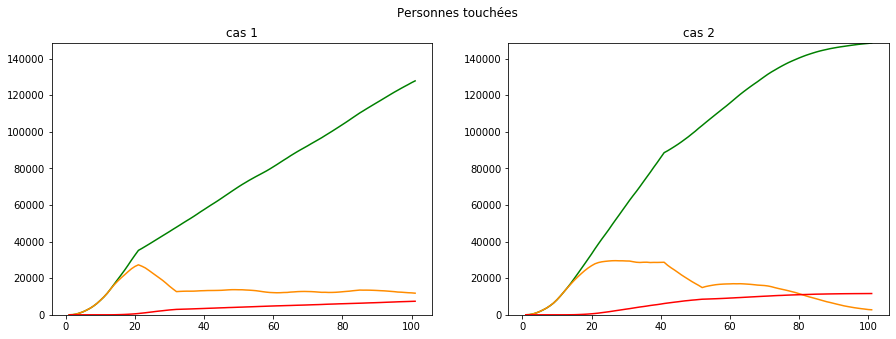

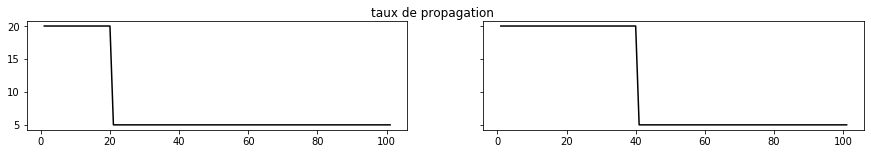

In [306]:
maxif = max(maxi,maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, NombrePersonnesAffectees,color='green',linestyle='solid')
ax1.plot(jours, NombrePersonnesTouchees,color='darkorange',linestyle='solid')
ax1.plot(jours, NombrePersonnesMortes,color='r',linestyle='solid')
ax1.set_ylim([0, maxif])
ax2.plot(jours, NombrePersonnesAffectees2, color='green', linestyle='solid')
ax2.plot(jours, NombrePersonnesTouchees2, color='darkorange', linestyle='solid')
ax2.plot(jours, NombrePersonnesMortes2, color='r', linestyle='solid')
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()

In [307]:
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

1er cas: 7403 morts
2e cas: 11626 morts


### approximation polynomiale pour montrer nos résultats à la télé

In [309]:
Aff = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees, 15))
Touchees = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees, 15))
Mortes = np.poly1d(np.polyfit(jours,NombrePersonnesMortes, 15))
Aff2 = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees2, 15))
Touchees2 = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees2, 15))
Mortes2 = np.poly1d(np.polyfit(jours,NombrePersonnesMortes2, 15))

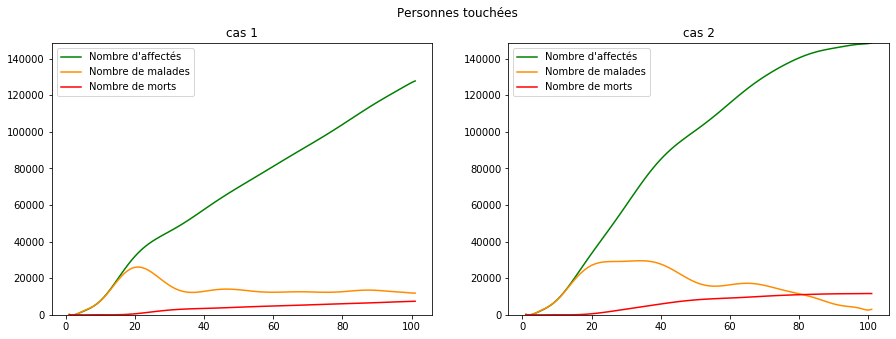

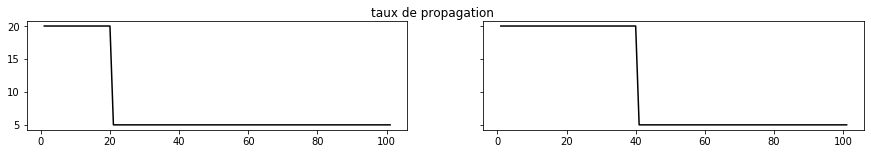

1er cas: 7403 morts
2e cas: 11626 morts


In [310]:
maxif = max(maxi, maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, Aff(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax1.plot(jours, Touchees(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax1.plot(jours, Mortes(jours), color='r', linestyle='solid', label="Nombre de morts")
ax1.set_ylim([0,maxif])
ax2.plot(jours, Aff2(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax2.plot(jours, Touchees2(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax2.plot(jours, Mortes2(jours), color='r', linestyle='solid', label="Nombre de morts")
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 
ax1.legend()
ax2.legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

### retarder le déconfinement?

In [319]:
l=[]
for i in range(10):
    l.append(0.2)
for i in range(30):
    l.append(0.05)
for i in range(60):
    l.append(0.2)

In [320]:
resultat = [A.PropagationVirus(l, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]

1 eme jours
3 personnes infectées
2 eme jours
14 personnes infectées
3 eme jours
36 personnes infectées
4 eme jours
75 personnes infectées
5 eme jours
128 personnes infectées
6 eme jours
177 personnes infectées
7 eme jours
247 personnes infectées
8 eme jours
339 personnes infectées
9 eme jours
456 personnes infectées
10 eme jours
563 personnes infectées
11 eme jours
610 personnes infectées
12 eme jours
652 personnes infectées
13 eme jours
696 personnes infectées
14 eme jours
724 personnes infectées
15 eme jours
730 personnes infectées
16 eme jours
760 personnes infectées
17 eme jours
760 personnes infectées
18 eme jours
737 personnes infectées
19 eme jours
672 personnes infectées
20 eme jours
636 personnes infectées
21 eme jours
686 personnes infectées
22 eme jours
709 personnes infectées
23 eme jours
722 personnes infectées
24 eme jours
750 personnes infectées
25 eme jours
783 personnes infectées
26 eme jours
798 personnes infectées
27 eme jours
818 personnes infectées
28 eme jours
82

24 eme jours
506 personnes infectées
25 eme jours
503 personnes infectées
26 eme jours
519 personnes infectées
27 eme jours
525 personnes infectées
28 eme jours
558 personnes infectées
29 eme jours
585 personnes infectées
30 eme jours
613 personnes infectées
31 eme jours
635 personnes infectées
32 eme jours
649 personnes infectées
33 eme jours
652 personnes infectées
34 eme jours
676 personnes infectées
35 eme jours
707 personnes infectées
36 eme jours
715 personnes infectées
37 eme jours
734 personnes infectées
38 eme jours
759 personnes infectées
39 eme jours
782 personnes infectées
40 eme jours
812 personnes infectées
41 eme jours
994 personnes infectées
42 eme jours
1093 personnes infectées
43 eme jours
1164 personnes infectées
44 eme jours
1229 personnes infectées
45 eme jours
1298 personnes infectées
46 eme jours
1338 personnes infectées
47 eme jours
1384 personnes infectées
48 eme jours
1399 personnes infectées
49 eme jours
1435 personnes infectées
50 eme jours
1481 personnes in

46 eme jours
1130 personnes infectées
47 eme jours
1232 personnes infectées
48 eme jours
1376 personnes infectées
49 eme jours
1520 personnes infectées
50 eme jours
1660 personnes infectées
51 eme jours
1707 personnes infectées
52 eme jours
1710 personnes infectées
53 eme jours
1646 personnes infectées
54 eme jours
1545 personnes infectées
55 eme jours
1471 personnes infectées
56 eme jours
1409 personnes infectées
57 eme jours
1347 personnes infectées
58 eme jours
1283 personnes infectées
59 eme jours
1208 personnes infectées
60 eme jours
1082 personnes infectées
61 eme jours
997 personnes infectées
62 eme jours
967 personnes infectées
63 eme jours
988 personnes infectées
64 eme jours
1010 personnes infectées
65 eme jours
1021 personnes infectées
66 eme jours
1035 personnes infectées
67 eme jours
1026 personnes infectées
68 eme jours
1038 personnes infectées
69 eme jours
1083 personnes infectées
70 eme jours
1162 personnes infectées
71 eme jours
1274 personnes infectées
72 eme jours
13

66 eme jours
1273 personnes infectées
67 eme jours
1260 personnes infectées
68 eme jours
1212 personnes infectées
69 eme jours
1133 personnes infectées
70 eme jours
1037 personnes infectées
71 eme jours
900 personnes infectées
72 eme jours
749 personnes infectées
73 eme jours
646 personnes infectées
74 eme jours
565 personnes infectées
75 eme jours
486 personnes infectées
76 eme jours
425 personnes infectées
77 eme jours
409 personnes infectées
78 eme jours
392 personnes infectées
79 eme jours
380 personnes infectées
80 eme jours
365 personnes infectées
81 eme jours
357 personnes infectées
82 eme jours
357 personnes infectées
83 eme jours
335 personnes infectées
84 eme jours
299 personnes infectées
85 eme jours
263 personnes infectées
86 eme jours
207 personnes infectées
87 eme jours
137 personnes infectées
88 eme jours
95 personnes infectées
89 eme jours
70 personnes infectées
90 eme jours
49 personnes infectées
91 eme jours
35 personnes infectées
92 eme jours
16 personnes infectées
9

1 eme jours
3 personnes infectées
2 eme jours
7 personnes infectées
3 eme jours
12 personnes infectées
4 eme jours
17 personnes infectées
5 eme jours
22 personnes infectées
6 eme jours
31 personnes infectées
7 eme jours
55 personnes infectées
8 eme jours
100 personnes infectées
9 eme jours
184 personnes infectées
10 eme jours
288 personnes infectées
11 eme jours
326 personnes infectées
12 eme jours
372 personnes infectées
13 eme jours
419 personnes infectées
14 eme jours
449 personnes infectées
15 eme jours
490 personnes infectées
16 eme jours
527 personnes infectées
17 eme jours
557 personnes infectées
18 eme jours
566 personnes infectées
19 eme jours
562 personnes infectées
20 eme jours
532 personnes infectées
21 eme jours
542 personnes infectées
22 eme jours
552 personnes infectées
23 eme jours
569 personnes infectées
24 eme jours
608 personnes infectées
25 eme jours
653 personnes infectées
26 eme jours
701 personnes infectées
27 eme jours
743 personnes infectées
28 eme jours
783 pe

24 eme jours
411 personnes infectées
25 eme jours
404 personnes infectées
26 eme jours
396 personnes infectées
27 eme jours
412 personnes infectées
28 eme jours
427 personnes infectées
29 eme jours
430 personnes infectées
30 eme jours
439 personnes infectées
31 eme jours
437 personnes infectées
32 eme jours
431 personnes infectées
33 eme jours
411 personnes infectées
34 eme jours
384 personnes infectées
35 eme jours
363 personnes infectées
36 eme jours
353 personnes infectées
37 eme jours
340 personnes infectées
38 eme jours
343 personnes infectées
39 eme jours
375 personnes infectées
40 eme jours
399 personnes infectées
41 eme jours
499 personnes infectées
42 eme jours
579 personnes infectées
43 eme jours
632 personnes infectées
44 eme jours
677 personnes infectées
45 eme jours
741 personnes infectées
46 eme jours
847 personnes infectées
47 eme jours
942 personnes infectées
48 eme jours
1039 personnes infectées
49 eme jours
1128 personnes infectées
50 eme jours
1192 personnes infectée

46 eme jours
1059 personnes infectées
47 eme jours
1136 personnes infectées
48 eme jours
1222 personnes infectées
49 eme jours
1358 personnes infectées
50 eme jours
1475 personnes infectées
51 eme jours
1399 personnes infectées
52 eme jours
1314 personnes infectées
53 eme jours
1301 personnes infectées
54 eme jours
1341 personnes infectées
55 eme jours
1346 personnes infectées
56 eme jours
1339 personnes infectées
57 eme jours
1303 personnes infectées
58 eme jours
1298 personnes infectées
59 eme jours
1307 personnes infectées
60 eme jours
1352 personnes infectées
61 eme jours
1461 personnes infectées
62 eme jours
1555 personnes infectées
63 eme jours
1592 personnes infectées
64 eme jours
1582 personnes infectées
65 eme jours
1622 personnes infectées
66 eme jours
1699 personnes infectées
67 eme jours
1747 personnes infectées
68 eme jours
1751 personnes infectées
69 eme jours
1709 personnes infectées
70 eme jours
1625 personnes infectées
71 eme jours
1548 personnes infectées
72 eme jours

67 eme jours
2132 personnes infectées
68 eme jours
2298 personnes infectées
69 eme jours
2459 personnes infectées
70 eme jours
2522 personnes infectées
71 eme jours
2584 personnes infectées
72 eme jours
2609 personnes infectées
73 eme jours
2543 personnes infectées
74 eme jours
2440 personnes infectées
75 eme jours
2344 personnes infectées
76 eme jours
2258 personnes infectées
77 eme jours
2127 personnes infectées
78 eme jours
1948 personnes infectées
79 eme jours
1724 personnes infectées
80 eme jours
1565 personnes infectées
81 eme jours
1388 personnes infectées
82 eme jours
1178 personnes infectées
83 eme jours
1006 personnes infectées
84 eme jours
902 personnes infectées
85 eme jours
798 personnes infectées
86 eme jours
701 personnes infectées
87 eme jours
608 personnes infectées
88 eme jours
510 personnes infectées
89 eme jours
430 personnes infectées
90 eme jours
367 personnes infectées
91 eme jours
323 personnes infectées
92 eme jours
291 personnes infectées
93 eme jours
251 pers

88 eme jours
1046 personnes infectées
89 eme jours
1053 personnes infectées
90 eme jours
1022 personnes infectées
91 eme jours
1003 personnes infectées
92 eme jours
972 personnes infectées
93 eme jours
987 personnes infectées
94 eme jours
992 personnes infectées
95 eme jours
971 personnes infectées
96 eme jours
911 personnes infectées
97 eme jours
784 personnes infectées
98 eme jours
648 personnes infectées
99 eme jours
534 personnes infectées
100 eme jours
439 personnes infectées
1 eme jours
7 personnes infectées
2 eme jours
29 personnes infectées
3 eme jours
67 personnes infectées
4 eme jours
108 personnes infectées
5 eme jours
150 personnes infectées
6 eme jours
202 personnes infectées
7 eme jours
287 personnes infectées
8 eme jours
367 personnes infectées
9 eme jours
480 personnes infectées
10 eme jours
595 personnes infectées
11 eme jours
643 personnes infectées
12 eme jours
678 personnes infectées
13 eme jours
716 personnes infectées
14 eme jours
753 personnes infectées
15 eme jo

In [321]:
l2=[]
for i in range(10):
    l2.append(0.2)
for i in range(50):
    l2.append(0.05)
for i in range(40):
    l2.append(0.2)

In [322]:
resultat2 = [A.PropagationVirus(l2, 10, True, 0, 0.01, 100*(i+1)) for i in range(20)]

1 eme jours
6 personnes infectées
2 eme jours
18 personnes infectées
3 eme jours
49 personnes infectées
4 eme jours
101 personnes infectées
5 eme jours
163 personnes infectées
6 eme jours
214 personnes infectées
7 eme jours
280 personnes infectées
8 eme jours
382 personnes infectées
9 eme jours
499 personnes infectées
10 eme jours
618 personnes infectées
11 eme jours
671 personnes infectées
12 eme jours
716 personnes infectées
13 eme jours
741 personnes infectées
14 eme jours
737 personnes infectées
15 eme jours
726 personnes infectées
16 eme jours
743 personnes infectées
17 eme jours
744 personnes infectées
18 eme jours
715 personnes infectées
19 eme jours
676 personnes infectées
20 eme jours
628 personnes infectées
21 eme jours
647 personnes infectées
22 eme jours
654 personnes infectées
23 eme jours
698 personnes infectées
24 eme jours
734 personnes infectées
25 eme jours
772 personnes infectées
26 eme jours
782 personnes infectées
27 eme jours
777 personnes infectées
28 eme jours
7

23 eme jours
631 personnes infectées
24 eme jours
640 personnes infectées
25 eme jours
650 personnes infectées
26 eme jours
665 personnes infectées
27 eme jours
706 personnes infectées
28 eme jours
759 personnes infectées
29 eme jours
786 personnes infectées
30 eme jours
797 personnes infectées
31 eme jours
806 personnes infectées
32 eme jours
798 personnes infectées
33 eme jours
794 personnes infectées
34 eme jours
795 personnes infectées
35 eme jours
801 personnes infectées
36 eme jours
795 personnes infectées
37 eme jours
771 personnes infectées
38 eme jours
750 personnes infectées
39 eme jours
759 personnes infectées
40 eme jours
765 personnes infectées
41 eme jours
781 personnes infectées
42 eme jours
792 personnes infectées
43 eme jours
788 personnes infectées
44 eme jours
775 personnes infectées
45 eme jours
774 personnes infectées
46 eme jours
761 personnes infectées
47 eme jours
732 personnes infectées
48 eme jours
703 personnes infectées
49 eme jours
648 personnes infectées
5

44 eme jours
477 personnes infectées
45 eme jours
487 personnes infectées
46 eme jours
504 personnes infectées
47 eme jours
531 personnes infectées
48 eme jours
544 personnes infectées
49 eme jours
555 personnes infectées
50 eme jours
587 personnes infectées
51 eme jours
651 personnes infectées
52 eme jours
713 personnes infectées
53 eme jours
743 personnes infectées
54 eme jours
749 personnes infectées
55 eme jours
749 personnes infectées
56 eme jours
767 personnes infectées
57 eme jours
770 personnes infectées
58 eme jours
785 personnes infectées
59 eme jours
792 personnes infectées
60 eme jours
788 personnes infectées
61 eme jours
870 personnes infectées
62 eme jours
904 personnes infectées
63 eme jours
967 personnes infectées
64 eme jours
1027 personnes infectées
65 eme jours
1106 personnes infectées
66 eme jours
1147 personnes infectées
67 eme jours
1219 personnes infectées
68 eme jours
1216 personnes infectées
69 eme jours
1234 personnes infectées
70 eme jours
1285 personnes infe

65 eme jours
976 personnes infectées
66 eme jours
1025 personnes infectées
67 eme jours
1099 personnes infectées
68 eme jours
1193 personnes infectées
69 eme jours
1284 personnes infectées
70 eme jours
1368 personnes infectées
71 eme jours
1363 personnes infectées
72 eme jours
1359 personnes infectées
73 eme jours
1437 personnes infectées
74 eme jours
1532 personnes infectées
75 eme jours
1635 personnes infectées
76 eme jours
1715 personnes infectées
77 eme jours
1748 personnes infectées
78 eme jours
1705 personnes infectées
79 eme jours
1664 personnes infectées
80 eme jours
1623 personnes infectées
81 eme jours
1547 personnes infectées
82 eme jours
1445 personnes infectées
83 eme jours
1308 personnes infectées
84 eme jours
1155 personnes infectées
85 eme jours
976 personnes infectées
86 eme jours
799 personnes infectées
87 eme jours
637 personnes infectées
88 eme jours
529 personnes infectées
89 eme jours
436 personnes infectées
90 eme jours
341 personnes infectées
91 eme jours
271 pe

86 eme jours
713 personnes infectées
87 eme jours
589 personnes infectées
88 eme jours
476 personnes infectées
89 eme jours
362 personnes infectées
90 eme jours
277 personnes infectées
91 eme jours
226 personnes infectées
92 eme jours
164 personnes infectées
93 eme jours
105 personnes infectées
94 eme jours
61 personnes infectées
95 eme jours
28 personnes infectées
96 eme jours
13 personnes infectées
97 eme jours
3 personnes infectées
98 eme jours
1 personnes infectées
99 eme jours
1 personnes infectées
100 eme jours
1 personnes infectées
1 eme jours
2 personnes infectées
2 eme jours
8 personnes infectées
3 eme jours
27 personnes infectées
4 eme jours
61 personnes infectées
5 eme jours
110 personnes infectées
6 eme jours
159 personnes infectées
7 eme jours
223 personnes infectées
8 eme jours
307 personnes infectées
9 eme jours
408 personnes infectées
10 eme jours
522 personnes infectées
11 eme jours
572 personnes infectées
12 eme jours
622 personnes infectées
13 eme jours
688 personnes

14 eme jours
564 personnes infectées
15 eme jours
608 personnes infectées
16 eme jours
634 personnes infectées
17 eme jours
615 personnes infectées
18 eme jours
566 personnes infectées
19 eme jours
500 personnes infectées
20 eme jours
440 personnes infectées
21 eme jours
445 personnes infectées
22 eme jours
418 personnes infectées
23 eme jours
389 personnes infectées
24 eme jours
356 personnes infectées
25 eme jours
327 personnes infectées
26 eme jours
321 personnes infectées
27 eme jours
314 personnes infectées
28 eme jours
309 personnes infectées
29 eme jours
315 personnes infectées
30 eme jours
340 personnes infectées
31 eme jours
341 personnes infectées
32 eme jours
362 personnes infectées
33 eme jours
376 personnes infectées
34 eme jours
377 personnes infectées
35 eme jours
364 personnes infectées
36 eme jours
353 personnes infectées
37 eme jours
338 personnes infectées
38 eme jours
325 personnes infectées
39 eme jours
323 personnes infectées
40 eme jours
319 personnes infectées
4

38 eme jours
405 personnes infectées
39 eme jours
408 personnes infectées
40 eme jours
401 personnes infectées
41 eme jours
416 personnes infectées
42 eme jours
424 personnes infectées
43 eme jours
444 personnes infectées
44 eme jours
458 personnes infectées
45 eme jours
497 personnes infectées
46 eme jours
525 personnes infectées
47 eme jours
556 personnes infectées
48 eme jours
597 personnes infectées
49 eme jours
626 personnes infectées
50 eme jours
656 personnes infectées
51 eme jours
678 personnes infectées
52 eme jours
682 personnes infectées
53 eme jours
678 personnes infectées
54 eme jours
693 personnes infectées
55 eme jours
707 personnes infectées
56 eme jours
735 personnes infectées
57 eme jours
754 personnes infectées
58 eme jours
746 personnes infectées
59 eme jours
750 personnes infectées
60 eme jours
729 personnes infectées
61 eme jours
759 personnes infectées
62 eme jours
784 personnes infectées
63 eme jours
828 personnes infectées
64 eme jours
937 personnes infectées
6

59 eme jours
427 personnes infectées
60 eme jours
449 personnes infectées
61 eme jours
552 personnes infectées
62 eme jours
618 personnes infectées
63 eme jours
676 personnes infectées
64 eme jours
717 personnes infectées
65 eme jours
757 personnes infectées
66 eme jours
797 personnes infectées
67 eme jours
858 personnes infectées
68 eme jours
949 personnes infectées
69 eme jours
1057 personnes infectées
70 eme jours
1164 personnes infectées
71 eme jours
1207 personnes infectées
72 eme jours
1302 personnes infectées
73 eme jours
1413 personnes infectées
74 eme jours
1534 personnes infectées
75 eme jours
1639 personnes infectées
76 eme jours
1694 personnes infectées
77 eme jours
1727 personnes infectées
78 eme jours
1809 personnes infectées
79 eme jours
1911 personnes infectées
80 eme jours
2038 personnes infectées
81 eme jours
2093 personnes infectées
82 eme jours
2116 personnes infectées
83 eme jours
2067 personnes infectées
84 eme jours
2014 personnes infectées
85 eme jours
1986 pers

80 eme jours
1169 personnes infectées
81 eme jours
1216 personnes infectées
82 eme jours
1236 personnes infectées
83 eme jours
1263 personnes infectées
84 eme jours
1291 personnes infectées
85 eme jours
1304 personnes infectées
86 eme jours
1310 personnes infectées
87 eme jours
1357 personnes infectées
88 eme jours
1425 personnes infectées
89 eme jours
1495 personnes infectées
90 eme jours
1462 personnes infectées
91 eme jours
1408 personnes infectées
92 eme jours
1365 personnes infectées
93 eme jours
1330 personnes infectées
94 eme jours
1310 personnes infectées
95 eme jours
1277 personnes infectées
96 eme jours
1203 personnes infectées
97 eme jours
1087 personnes infectées
98 eme jours
954 personnes infectées
99 eme jours
812 personnes infectées
100 eme jours
765 personnes infectées
1 eme jours
10 personnes infectées
2 eme jours
43 personnes infectées
3 eme jours
82 personnes infectées
4 eme jours
117 personnes infectées
5 eme jours
156 personnes infectées
6 eme jours
221 personnes i

In [323]:
resultat_bis = []
for i in range(len(resultat[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat)):
        NombreInfectes += resultat[j][i][1]
        NombreAffectees += resultat[j][i][2]
        NombreMorts += resultat[j][i][4]
        
    resultat_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat = resultat_bis

In [329]:
resultat2_bis = []
for i in range(len(resultat2[0])):
    NombreInfectes = 0
    NombreAffectees = 0
    NombreMorts = 0
    for j in range(len(resultat2)):
        NombreInfectes += resultat2[j][i][1]
        NombreAffectees += resultat2[j][i][2]
        NombreMorts += resultat2[j][i][4]
        
    resultat2_bis.append([i+1, NombreInfectes, NombreAffectees, 0, NombreMorts])
resultat2 = resultat2_bis

In [330]:
NombrePersonnesTouchees2 = []
NombrePersonnesAffectees2 = []
NombrePersonnesMortes2 = []
maxi2 = 0
for jour in resultat2:
    NombrePersonnesTouchees2.append(jour[1])
    NombrePersonnesAffectees2.append(jour[2])
    NombrePersonnesMortes2.append(jour[4])
    if maxi2 < jour[2]:
        maxi2 = jour[2]      
Mesures2 = []
for i in l2:
    Mesures2.append(i*100)
Mesures2.append(Mesures2[-1])

[[1, 20, 20, 0, 0], [2, 100, 80, 0, 0], [3, 428, 408, 0, 0], [4, 1061, 1041, 0, 0], [5, 1751, 1731, 0, 0], [6, 2536, 2516, 0, 0], [7, 3452, 3432, 0, 0], [8, 4579, 4559, 0, 0], [9, 5916, 5896, 0, 0], [10, 7500, 7480, 0, 0], [11, 9333, 9313, 0, 0], [12, 10165, 10165, 0, 0], [13, 11076, 11156, 0, 1], [14, 11784, 12192, 0, 17], [15, 12261, 13302, 0, 51], [16, 12670, 14401, 0, 81], [17, 12951, 15467, 0, 113], [18, 13197, 16629, 0, 162], [19, 13224, 17783, 0, 222], [20, 13023, 18919, 0, 304], [21, 12506, 19986, 0, 403], [22, 11838, 21151, 0, 509], [23, 12124, 22289, 0, 554], [24, 12295, 23451, 0, 610], [25, 12336, 24528, 0, 667], [26, 12323, 25625, 0, 721], [27, 12347, 26748, 0, 764], [28, 12444, 27911, 0, 825], [29, 12515, 29144, 0, 883], [30, 12588, 30371, 0, 935], [31, 12734, 31653, 0, 994], [32, 12870, 32856, 0, 1052], [33, 12942, 34093, 0, 1113], [34, 13082, 35371, 0, 1185], [35, 13235, 36686, 0, 1236], [36, 13433, 37961, 0, 1300], [37, 13585, 39210, 0, 1352], [38, 13639, 40387, 0, 1427

In [331]:
NombrePersonnesTouchees = []
NombrePersonnesAffectees = []
NombrePersonnesMortes = []
maxi = 0
jours = []
for jour in resultat:
    NombrePersonnesTouchees.append(jour[1])
    NombrePersonnesAffectees.append(jour[2])
    NombrePersonnesMortes.append(jour[4])
    if maxi < jour[2]:
        maxi = jour[2]      
    jours.append(jour[0])
Mesures = []
for i in l:
    Mesures.append(i*100)
Mesures.append(Mesures[-1])

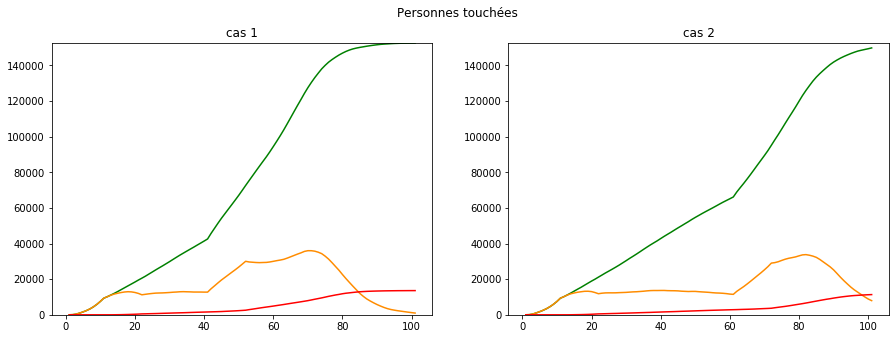

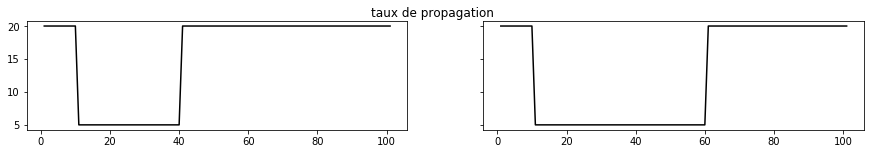

In [332]:
maxif = max(maxi,maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, NombrePersonnesAffectees,color='green',linestyle='solid')
ax1.plot(jours, NombrePersonnesTouchees,color='darkorange',linestyle='solid')
ax1.plot(jours, NombrePersonnesMortes,color='r',linestyle='solid')
ax1.set_ylim([0, maxif])
ax2.plot(jours, NombrePersonnesAffectees2, color='green', linestyle='solid')
ax2.plot(jours, NombrePersonnesTouchees2, color='darkorange', linestyle='solid')
ax2.plot(jours, NombrePersonnesMortes2, color='r', linestyle='solid')
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 

plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()

In [333]:
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

1er cas: 13586 morts
2e cas: 11344 morts


### approximation polynomiale pour montrer nos résultats à la télé

In [334]:
Aff = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees, 15))
Touchees = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees, 15))
Mortes = np.poly1d(np.polyfit(jours,NombrePersonnesMortes, 15))
Aff2 = np.poly1d(np.polyfit(jours, NombrePersonnesAffectees2, 15))
Touchees2 = np.poly1d(np.polyfit(jours,NombrePersonnesTouchees2, 15))
Mortes2 = np.poly1d(np.polyfit(jours,NombrePersonnesMortes2, 15))

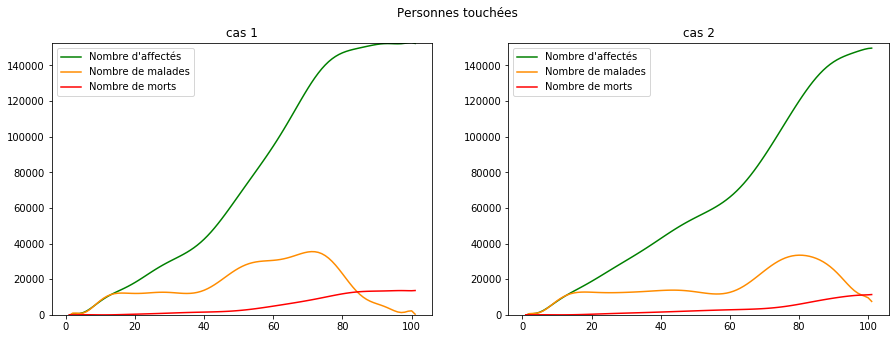

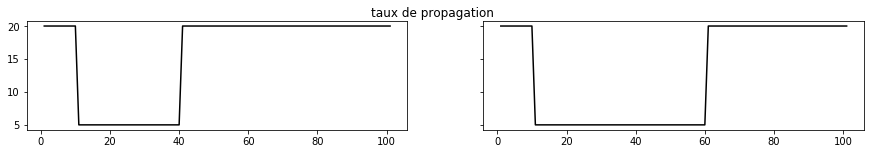

1er cas: 13586 morts
2e cas: 11344 morts


In [335]:
maxif = max(maxi, maxi2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 

ax1.set_title(r'cas 1')  
ax2.set_title(r'cas 2')
ax1.plot(jours, Aff(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax1.plot(jours, Touchees(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax1.plot(jours, Mortes(jours), color='r', linestyle='solid', label="Nombre de morts")
ax1.set_ylim([0,maxif])
ax2.plot(jours, Aff2(jours), color='green', linestyle='solid', label="Nombre d'affectés")
ax2.plot(jours, Touchees2(jours), color='darkorange', linestyle='solid', label="Nombre de malades")
ax2.plot(jours, Mortes2(jours), color='r', linestyle='solid', label="Nombre de morts")
ax2.set_ylim([0, maxif])
fig.suptitle('Personnes touchées') 
ax1.legend()
ax2.legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 2), sharey=True) 

fig.suptitle('taux de propagation')
ax[0].plot(jours, Mesures, color='black')
ax[1].plot(jours, Mesures2, color='black')

plt.show()
print('1er cas:', NombrePersonnesMortes[-1], 'morts')
print('2e cas:', NombrePersonnesMortes2[-1], 'morts')

In [ ]:
start = time.time()
A.UploadEdgesPropagation()
A.AjoutCouleurs(A.EdgesTypePropagation,'w','r')
G = nx.Graph()
G.add_nodes_from(A.nodes)
G.add_edges_from(A.EdgesPropagation)
nx.draw(G, pos, node_size=0.4, width=0.2, edge_color=list(A.EdgesColor))
plt.savefig("Propagation.png") # save as png
plt.show() # display
print(time.time()-start)

### Zombie

In [279]:
l = []
for i in range(20):
    l.append(0.2)
for i in range(20):
    l.append(0.15)   
for i in range(20):
    l.append(0.10)
for i in range(40):
    l.append(0.05)

In [280]:
resultats = A.PropagationVirus(l, 1000, True, 0, 0, 100) 

1 eme jours
3 personnes infectées
2 eme jours
13 personnes infectées
3 eme jours
30 personnes infectées
4 eme jours
58 personnes infectées
5 eme jours
109 personnes infectées
6 eme jours
168 personnes infectées
7 eme jours
226 personnes infectées
8 eme jours
287 personnes infectées
9 eme jours
373 personnes infectées
10 eme jours
486 personnes infectées
11 eme jours
589 personnes infectées
12 eme jours
735 personnes infectées
13 eme jours
888 personnes infectées
14 eme jours
1035 personnes infectées
15 eme jours
1187 personnes infectées
16 eme jours
1389 personnes infectées
17 eme jours
1616 personnes infectées
18 eme jours
1776 personnes infectées
19 eme jours
1906 personnes infectées
20 eme jours
2064 personnes infectées
21 eme jours
2191 personnes infectées
22 eme jours
2311 personnes infectées
23 eme jours
2425 personnes infectées
24 eme jours
2553 personnes infectées
25 eme jours
2710 personnes infectées
26 eme jours
2880 personnes infectées
27 eme jours
3056 personnes infectées
2

In [283]:
nombre_de_mort = [resultat[1] for resultat in resultats]
nombre_de_vivant = [A.NombrePersonnes-nombre for nombre in nombre_de_mort]

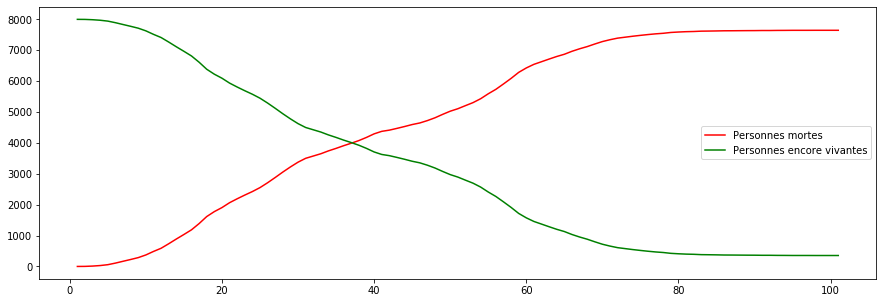

to the happy few still living... 101 in fact...


In [286]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(jours, nombre_de_mort, color='r', linestyle='solid', label="Personnes mortes")
ax.plot(jours, nombre_de_vivant, color='g', linestyle='solid', label="Personnes encore vivantes")
ax1.set_title(r"Scénario apocalyptique")  
ax.legend()
plt.show()
print("to the happy few still living...",len(nombre_de_vivant),"in fact...")
